
###**E-COMMERCE CUSTOMER SEGMENTATION USING CLUSTERING (K-MEANS ALGORITHM)**

**Importing Necessary Libraries**

**import pandas as pd:** Imports the pandas library for data manipulation.

**import numpy as np:** Imports the numpy library for numerical operations.

**import matplotlib.pyplot as plt:** Imports the matplotlib library for data visualization.

**from sklearn.cluster import KMeans:** Imports the KMeans algorithm from scikit-learn for clustering.

**from sklearn.metrics import silhouette_score:** Imports the silhouette_score function to evaluate clustering quality.

**from sklearn.cluster import KMeans:** Imports the KMeans algorithm from scikit-learn for clustering.

**from yellowbrick.cluster import KElbowVisualizer:** Imports the KElbowVisualizer from yellowbrick for determining the optimal number of clusters.

**import warnings:** Imports the warnings library to manage warnings.
warnings.filterwarnings("ignore"): Ignores warnings for cleaner output.

In [4]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

**Load the Data**

In [5]:
data=pd.read_excel("/content/ecom customer_data.xlsx")
data


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**EDA**

**df.head():** Displays the first 5 rows of the DataFrame to verify the data loading.

In [6]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**df = data.copy():** Creates a copy of the original DataFrame to ensure that the original data remains unchanged.

**df.info():** Displays a concise summary of the DataFrame, including the number of non-null entries and the data types of each column.

In [7]:
df=data.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

**df.describe():** Generates descriptive statistics of the DataFrame df. This includes measures such as count, mean, standard deviation, minimum, maximum, and the quartile values (25%, 50%, and 75%) for each numerical column.
Output:

In [8]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


**Data Cleaning**

**df.duplicated()**: This method returns a boolean Series indicating whether each row is a duplicate of a previous row.

**df[df.duplicated()]:** Filters the DataFrame df to show only the rows where df.duplicated() is True.

In [9]:
df[df.duplicated()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


**df.isna().sum():** Sums up the number of NaN values in each column of the DataFrame.

In [10]:
df.isna().sum()

,0
Cust_ID,0
Gender,2724
Orders,0
Jordan,0
Gatorade,0
Samsung,0
Asus,0
Udis,0
Mondelez International,0
Wrangler,0


**df['Gender'].mode():** Calculates the mode (the most frequent value) of the 'Gender' column. mode() returns a Series, so [0] is used to get the first (and usually the only) value.

**df['Gender'].fillna(df['Gender'].mode()[0]):** Replaces all NaN values in the 'Gender' column with the mode of the 'Gender' column.

In [11]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

**df.isna().sum().sum():** Sums up the values of the Series generated by df.isna().sum(), resulting in a single integer value that represents the total number of missing values in the entire DataFrame.

In [12]:
df.isna().sum().sum()

np.int64(0)

**Data Visualization**

**df.Gender.value_counts():** Counts the occurrences of each unique value in the "Gender" column


In [13]:
df.Gender.value_counts()

,count
Gender,
F,24778
M,5222


**sns.countplot(data=df, x='Gender'):** This line creates a countplot using seaborn's countplot function. The data parameter specifies the DataFrame to use (df), and the x parameter specifies the column to plot on the x-axis, which is 'Gender' in this case.

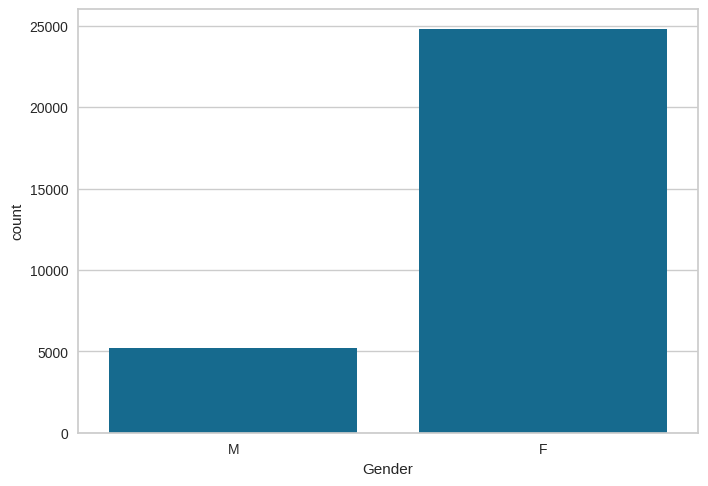

In [14]:
sns.countplot(data=df,x='Gender')
plt.show()


**plt.figure(figsize=(15, 5)):** This line creates a new figure with a specified size of 15 inches in width and 5 inches in height.

**plt.subplot(1, 2, 1):** This command sets up a subplot grid with 1 row and 2 columns, then selects the first subplot for plotting.

**sns.countplot(data=df, x='Orders'):** This line creates a countplot using seaborn's countplot function. It visualizes the distribution of values in the "Orders" column of the DataFrame df.

<Axes: xlabel='Orders', ylabel='count'>

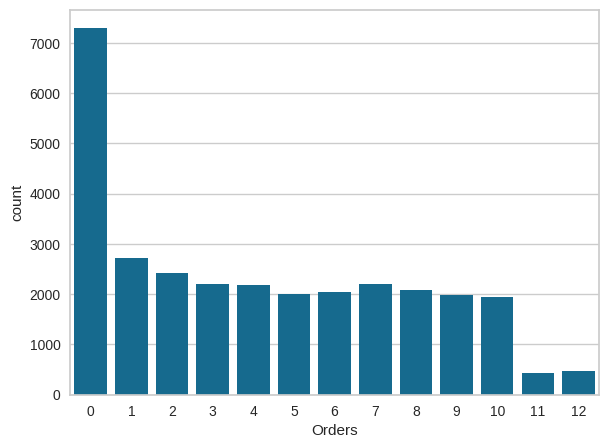

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Orders')


**plt.subplot(1, 2, 2):** This command sets up a subplot grid with 1 row and 2 columns, then selects the second subplot for plotting.

**sns.countplot(data=df, x='Orders', hue='Gender'):** This line creates a countplot using seaborn's countplot function. It visualizes the distribution of values in the "Orders" column of the DataFrame df, with separate bars for each gender (specified by the hue parameter).

**plt.suptitle("Overall Orders VS Gender wise Orders"):** This command adds a super title to the entire plot, providing a title for the entire figure.

**plt.show():** This command displays the plot.

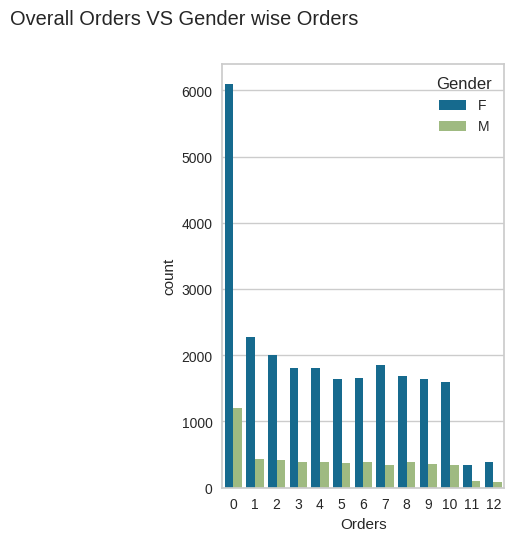

In [16]:
#Order count by each number
plt.subplot(1,2,2)
sns.countplot(data=df,x='Orders',hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()


**cols = list(df.columns[2:]):** This line extracts column names from the DataFrame df starting from the third column (index 2) and converts them into a list.

**def dist_list(lst):** This defines a function named dist_list that takes a list of column names as input.

**plt.figure(figsize=(30, 30))**: This sets up the size of the figure to be 30x30 inches.

**for i, col in enumerate(lst, 1):** This loop iterates over each column name in the input list, lst, using the enumerate function. The loop variable i is the index of the current column, starting from 1.

**plt.subplot(6, 6, i):** This line creates subplots within a grid of 6 rows and 6 columns, with the current index i specifying the position of the subplot.

**sns.boxplot(data=df, x=df[col]):** This line creates a boxplot for the current column (col) of the DataFrame df, displaying the distribution of values.

**dist_list(cols):** This line calls the dist_list function with the list of column names (cols) as input, which triggers the creation of boxplots for each column in the specified layout.

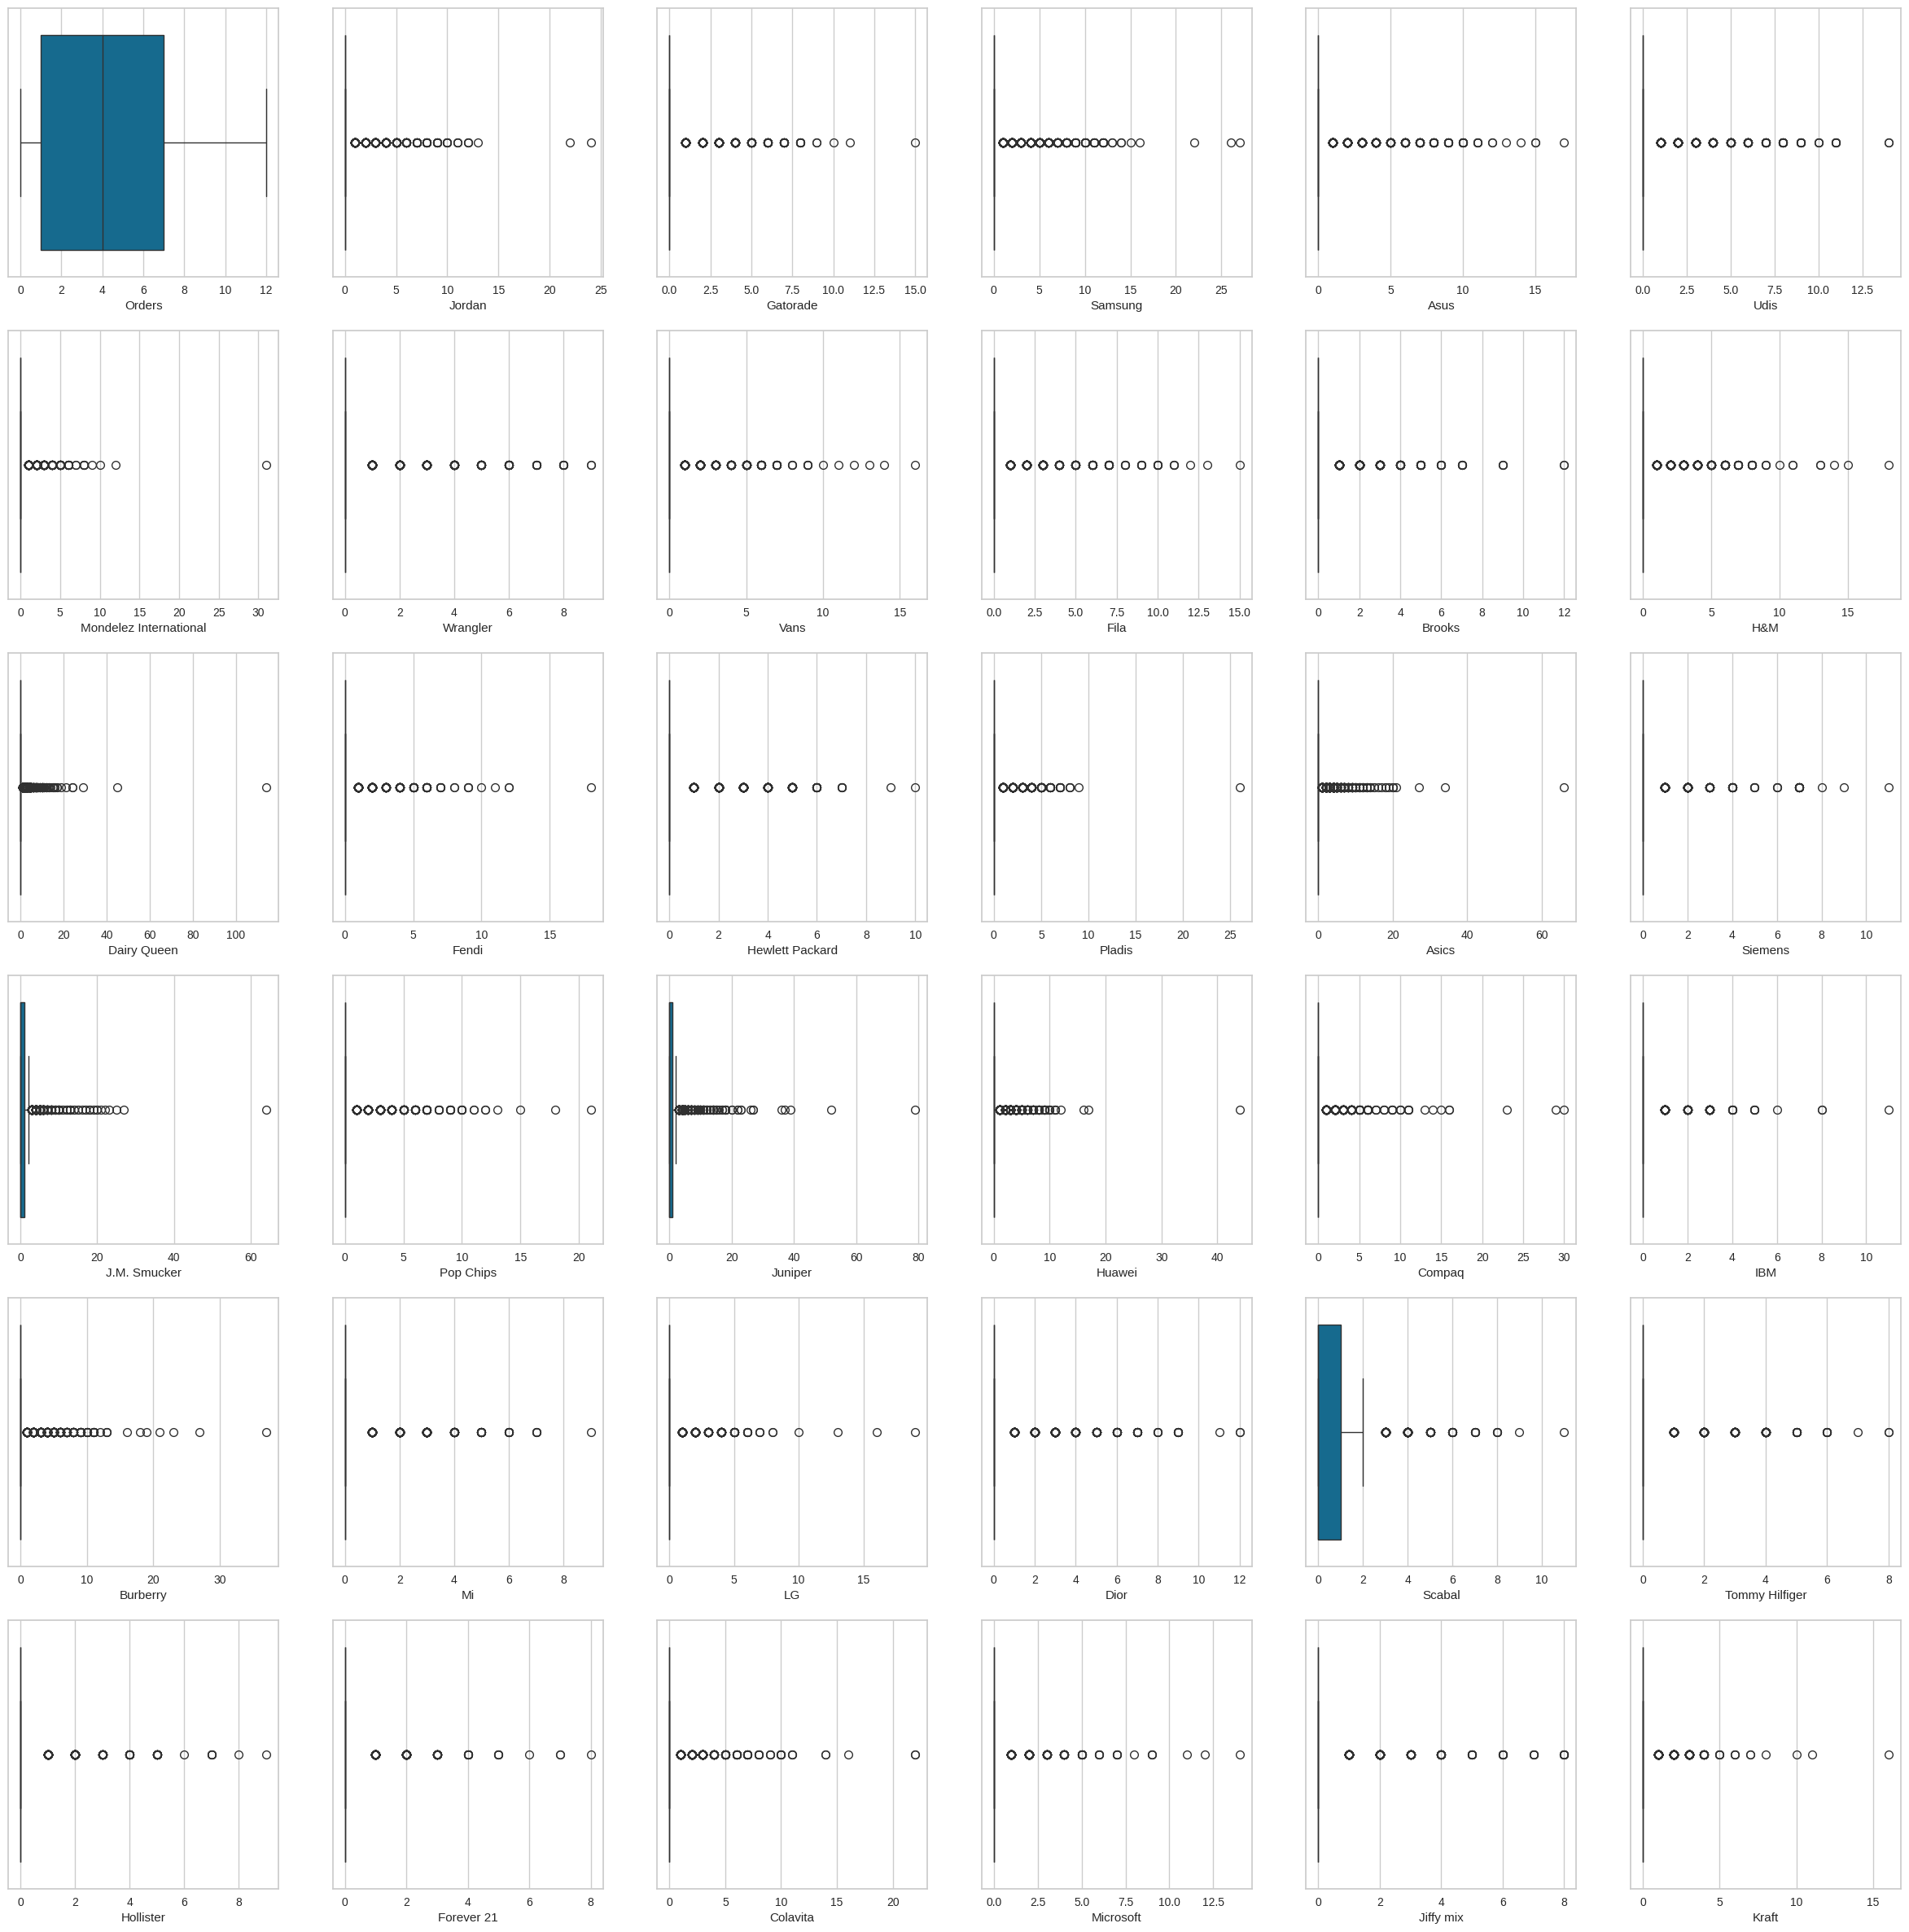

In [17]:
#Orders and searches of each brands
cols=list(df.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(30,30))
  for i, col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data=df,x=df[col])
dist_list(cols)


**plt.figure(figsize=(20, 15)):** This line sets up the size of the figure to be displayed, with a width of 20 inches and a height of 15 inches.

**sns.heatmap(df.iloc[:, 3:].corr()):** This command creates a heatmap using seaborn's heatmap function. It visualizes the correlation matrix for columns of the DataFrame df starting from the fourth column (iloc[:, 3:]). The corr() function calculates the correlation coefficients between pairs of columns, and heatmap visualizes these correlations as a color-encoded matrix.

**plt.show():** This command displays the heatmap on the screen.

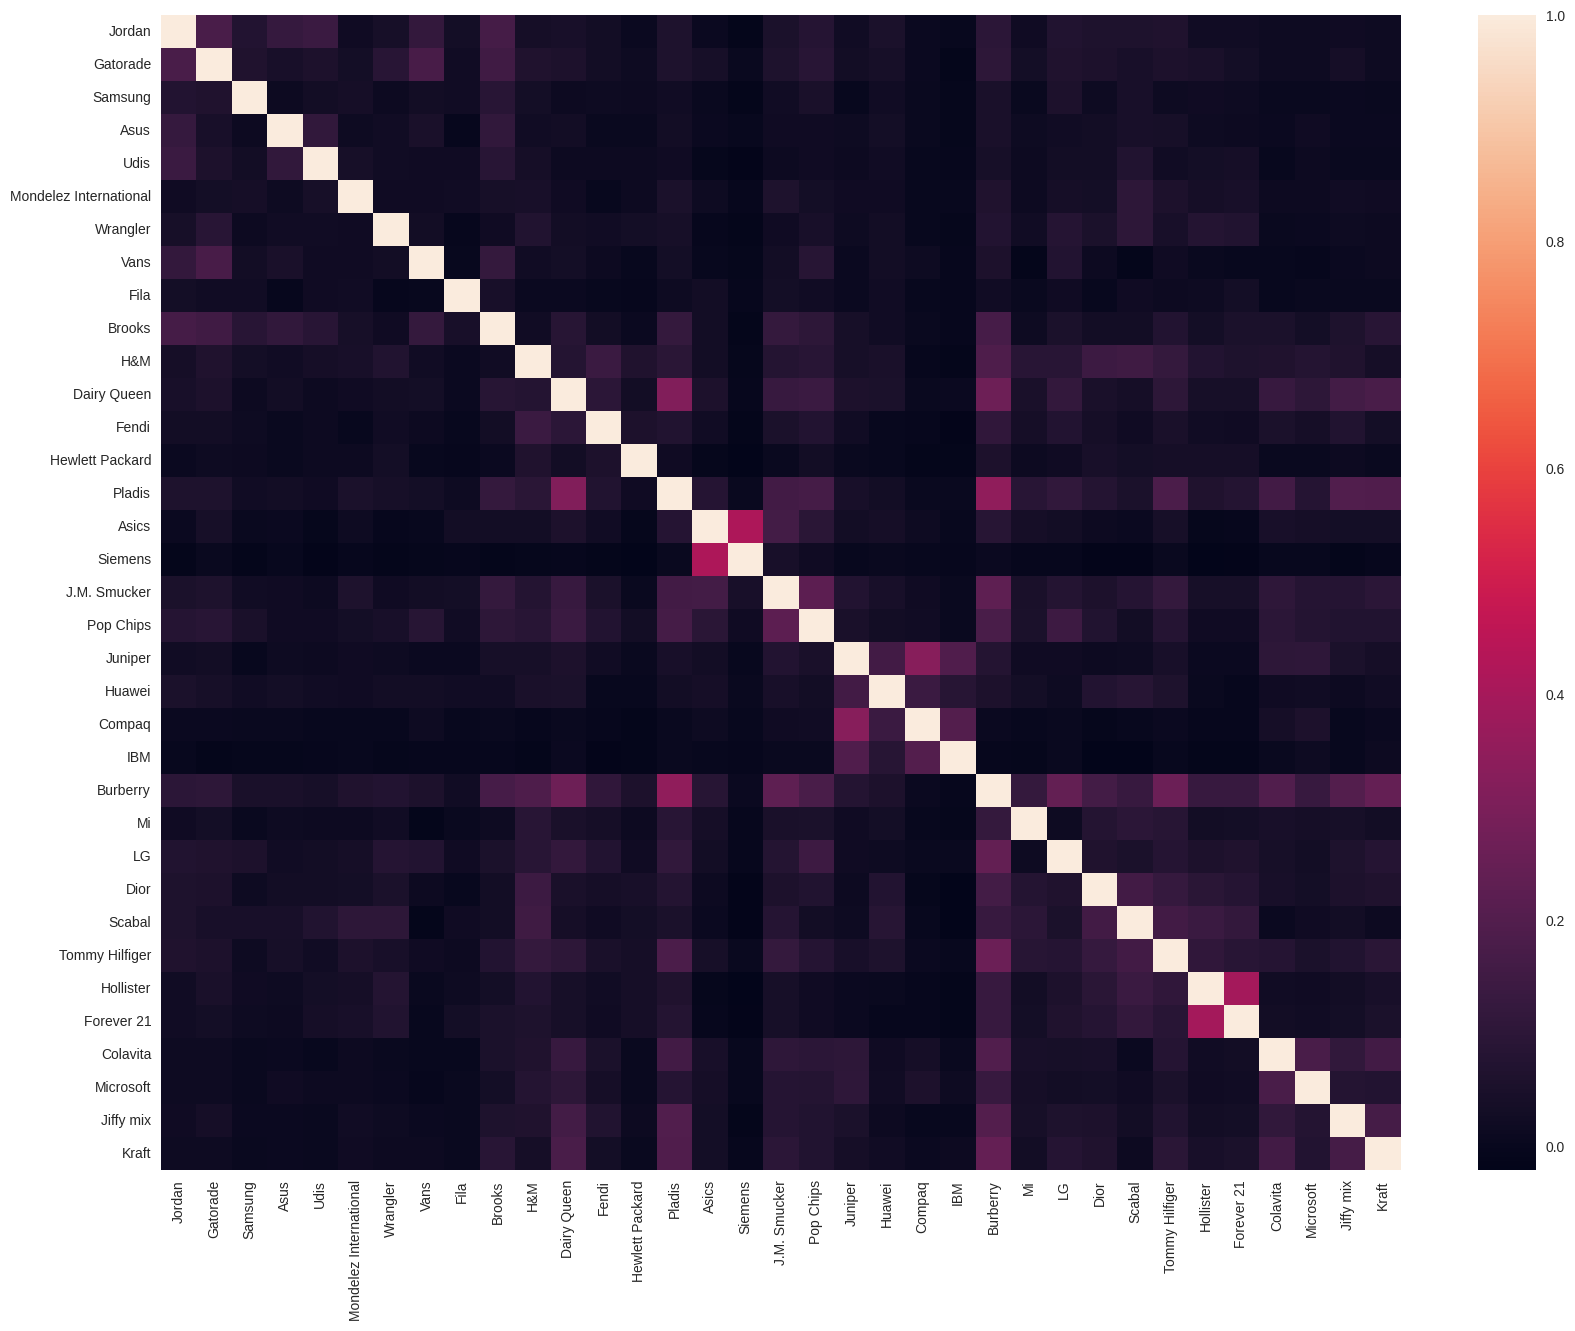

In [18]:
#Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()


**df.iloc[:2, :]:** This selects the first two rows of the DataFrame df and all columns. The iloc indexer is used for integer-based indexing.

**.hist(figsize=(40, 30)):** This creates histograms for each column in the selected rows. The figsize parameter specifies the size of the figure to be displayed, with a width of 40 inches and a height of 30 inches.

**plt.show():** This command displays the histograms on the screen.

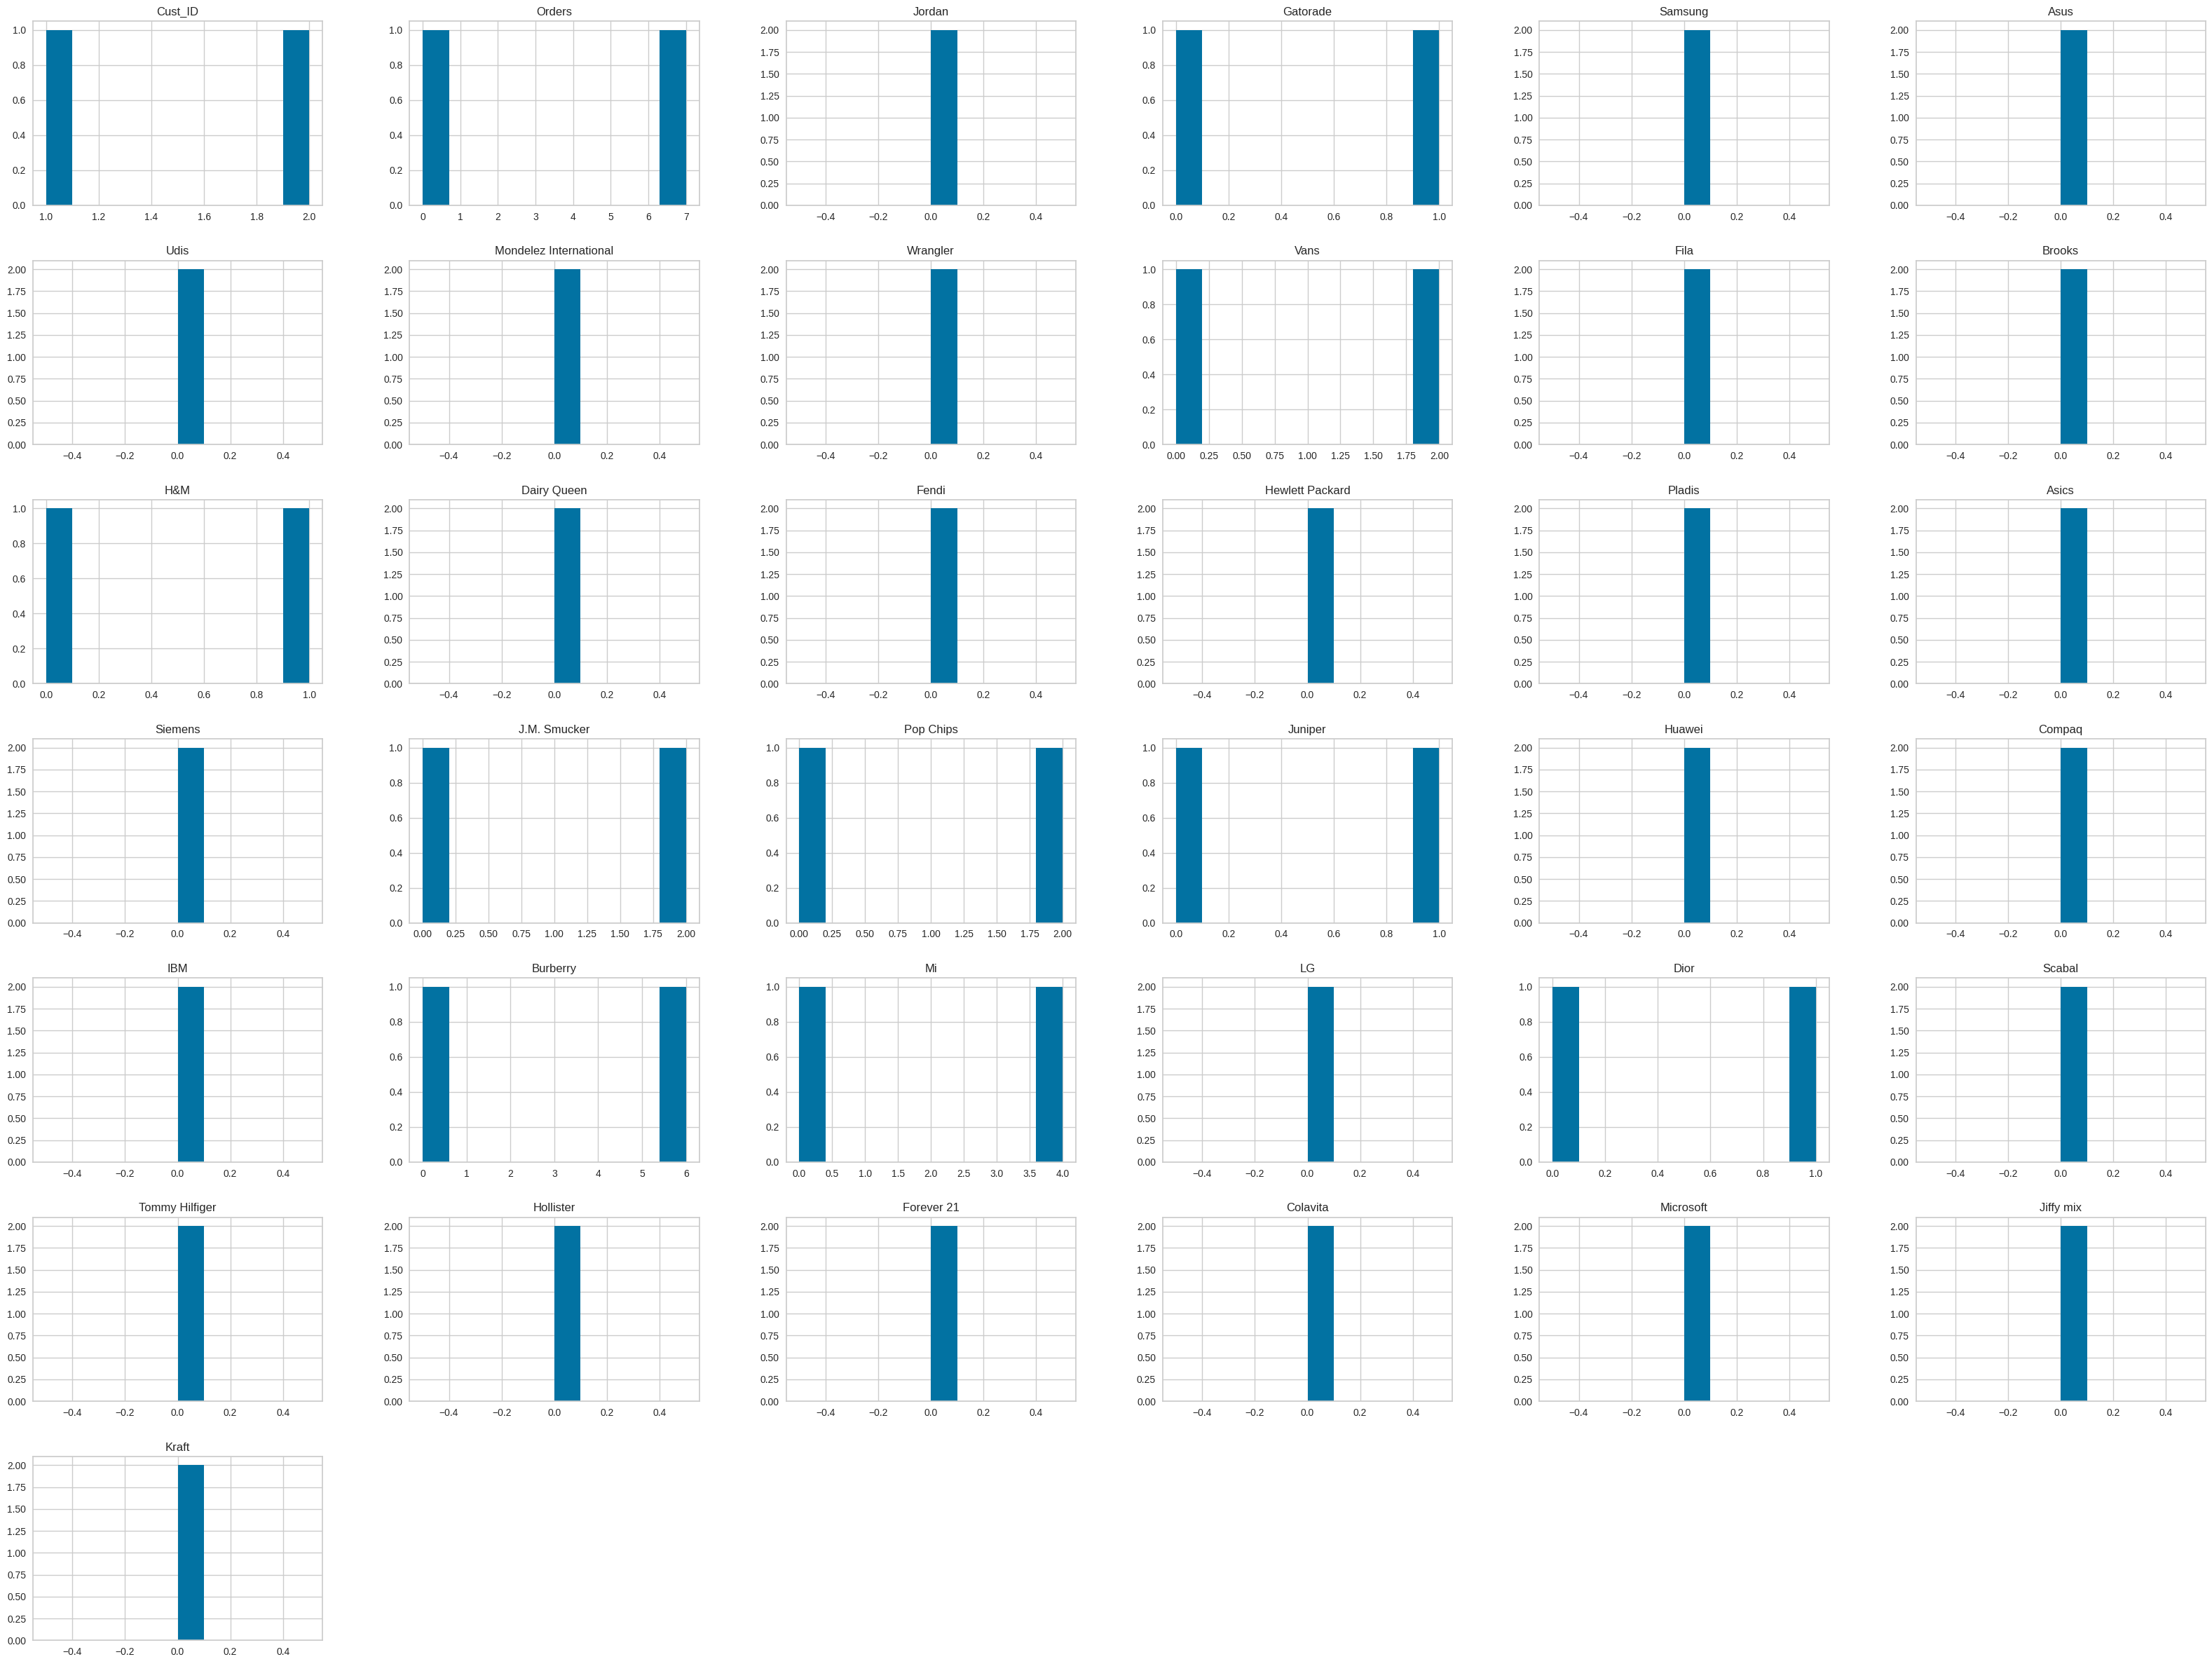

In [19]:
df.iloc[:2,:].hist(figsize=(40,30))
plt.show()


**new_df = df.copy():** This line creates a copy of the original DataFrame df, named new_df. This is done to avoid modifying the original DataFrame and work with a separate copy.

**new_df['Total Search'] = new_df.iloc[:, 3:].sum(axis=1):** This line calculates the sum of searches for each row in the DataFrame new_df, excluding the first three columns (presumably non-search-related columns), and assigns it to a new column named 'Total Search'. The sum(axis=1) calculates the sum across columns for each row.

In [20]:
new_df=df.copy()
new_df['Total Search']=new_df.iloc[:,3:].sum(axis=1)


**plt.figure(figsize=(13, 8)):** This line sets up the size of the figure to be displayed, with a width of 13 inches and a height of 8 inches.

**plt_data = new_df.sort_values('Total Search', ascending=False)[['Cust_ID', 'Gender', 'Total Search']].head(10):** This line selects the top 10 rows of the DataFrame new_df based on total search activity, and only retains the 'Cust_ID', 'Gender', and 'Total Search' columns. It sorts the DataFrame by 'Total Search' column in descending order.

**sns.barplot(data=plt_data, x='Cust_ID', y='Total Search', hue='Gender', order=plt_data.sort_values('Total Search', ascending=False).Cust_ID):** This command creates a bar plot using seaborn's barplot function. It plots the 'Cust_ID' on the x-axis, 'Total Search' on the y-axis, and differentiates by 'Gender' using different colors. The order parameter specifies the order of 'Cust_ID' based on the total search activity.

**plt.title("Top 10 Cust_ID based on Total Searches"):** This line adds a title to the plot, describing its content.

**plt.show():** This command displays the plot.

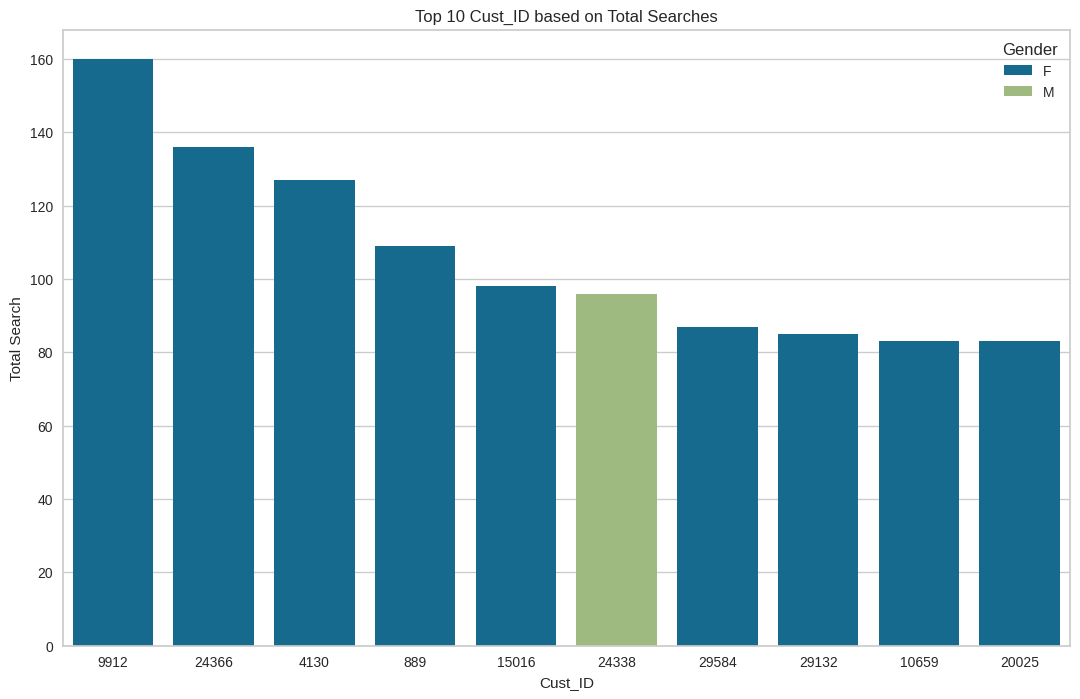

In [21]:
plt.figure(figsize=(13,8))
plt_data=new_df.sort_values('Total Search',ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
sns.barplot(data=plt_data,
            x='Cust_ID',
            y='Total Search',
            hue='Gender',
            order=plt_data.sort_values('Total Search',ascending=False).Cust_ID)
plt.title("Top 10 Cust_ID based on Total Searches")
plt.show()


**Scaling**

**df.iloc[:, 2:]:** This uses integer-based indexing (iloc) to select all rows (:) and all columns starting from the third column (index 2) to the end (2:). This subset of the DataFrame contains only the values from these columns.

**.values:** This converts the selected subset of the DataFrame into a NumPy array. Each row of the array corresponds to a row of the DataFrame, and each column of the array corresponds to a column of the DataFrame, excluding the index and column labels.

In [22]:
x=df.iloc[:,2:].values
x


array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]])

**scale = MinMaxScaler():** This line creates an instance of MinMaxScaler, which is used for scaling features to a specified range, typically [0, 1].

**features = scale.fit_transform(x)**: This line first fits the scaler to the data (x) to compute the minimum and maximum values of each feature. Then, it transforms the data based on these minimum and maximum values, scaling each feature to the specified range. The scaled features are stored in the variable features.

In [23]:
scale=MinMaxScaler()
features=scale.fit_transform(x)
features


array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Elbow method to get the optimal K value**

**inertia = []:** This line initializes an empty list named inertia to store the inertia values for different numbers of clusters.

**for i in range(1, 16):** This loop iterates through the numbers from 1 to 15, representing the number of clusters to be used in KMeans clustering.

**k_means = KMeans(n_clusters=i):** Inside the loop, a KMeans clustering model is initialized with the current number of clusters i.

**k_means = k_means.fit(features):** The KMeans model is then fitted to the scaled features features.

**inertia.append(k_means.inertia_):** After fitting the model, the inertia (sum of squared distances of samples to their closest cluster center) is computed using the inertia_ attribute of the fitted KMeans model and appended to the inertia list.

In [24]:
inertia=[]
for i in range(1,16):
  k_means=KMeans(n_clusters=i)
  k_means=k_means.fit(features)
  inertia.append(k_means.inertia_)


**plt.figure(figsize=(20, 7)):** This line sets up the size of the figure to be displayed, with a width of 20 inches and a height of 7 inches.

**plt.subplot(1, 2, 1):** This command creates a subplot grid with 1 row and 2 columns, then selects the first subplot for plotting.

**plt.plot(range(1, 16), inertia, 'bo-'):** This line plots the inertia values against the number of clusters. The range(1, 16) provides the x-values (number of clusters from 1 to 15), inertia provides the y-values (inertia values computed for each number of clusters), and 'bo-' specifies the color ('b' for blue), marker style ('o' for circles), and line style ('-' for solid line).

**plt.xlabel('No of clusters'):** This line sets the label for the x-axis to "No of clusters", providing context for the plotted data.

**plt.ylabel('Inertia')**: This line sets the label for the y-axis to "Inertia", indicating what is being measured or plotted on the y-axis.

(Text(0.5, 0, 'No of clusters'), Text(0, 0.5, 'Inertia'))

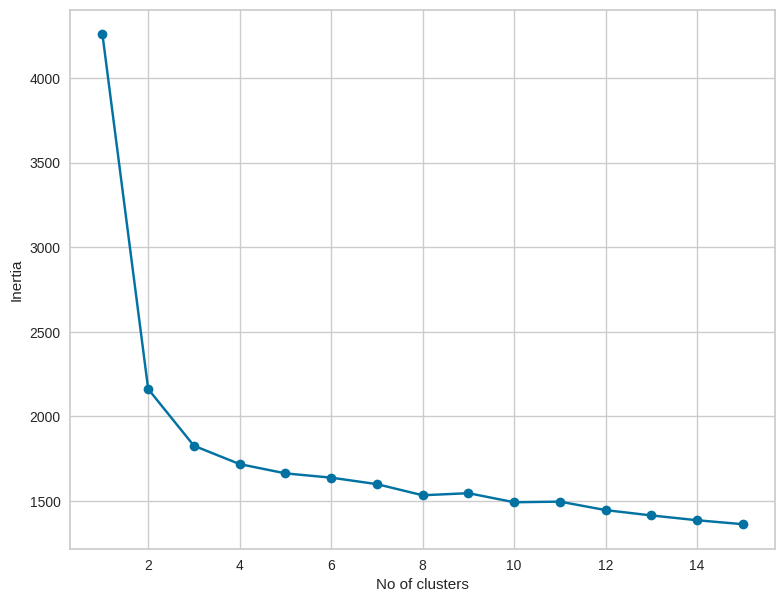

In [25]:
#Elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16),inertia, 'bo-')
plt.xlabel('No of clusters'),plt.ylabel('Inertia')


**plt.subplot(1, 2, 2):** This command creates a subplot grid with 1 row and 2 columns, then selects the second subplot for plotting.

**kmeans = KMeans()**: This line initializes a KMeans clustering model without specifying the number of clusters.

**visualize = KElbowVisualizer(kmeans, k=(1, 16)):** This line initializes the KElbowVisualizer with the KMeans model and specifies the range of clusters (from 1 to 16) to consider for the elbow analysis.

**visualize.fit(features):** This command fits the KElbowVisualizer to the scaled features, computing the distortion score (inertia) for each number of clusters in the specified range.

**plt.suptitle("Elbow Graph and Elbow Visualizer"):** This line adds a super title to the entire plot, providing a descriptive title for both the elbow graph and the Kelbow visualizer.

**visualize.poof():** This command displays the Kelbow visualizer, showing the distortion score (inertia) for different numbers of clusters and highlighting the optimal number of clusters based on the elbow method.

**plt.show():** This command displays the entire plot, including both the elbow graph and the Kelbow visualizer.

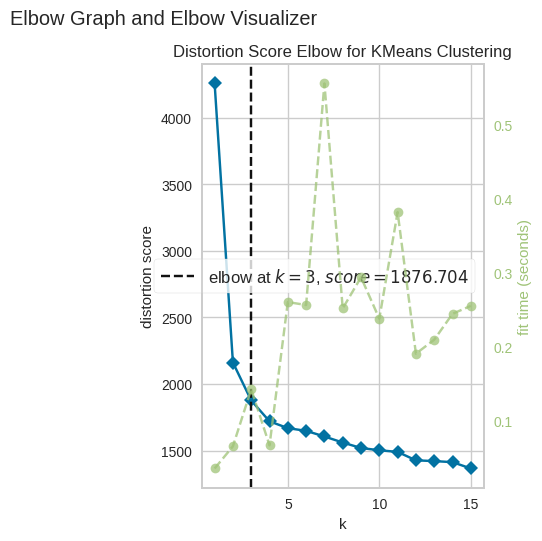

In [26]:
#Kelbow visualizer
plt.subplot(1,2,2)
kmeans=KMeans()
visualize=KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(features)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()


**Silhouette Score for each k value**

**silhouette_avg = []:** This line initializes an empty list named silhouette_avg to store the silhouette scores for different numbers of clusters.

**for i in range(2, 16)::** This loop iterates through the numbers from 2 to 15, representing the number of clusters to be used in KMeans clustering.

**kmeans = KMeans(n_clusters=i):** Inside the loop, a KMeans clustering model is initialized with the current number of clusters i.

**cluster_labels = kmeans.fit_predict(features):** The fit_predict method of the KMeans model is used to fit the model to the scaled features (features) and predict the cluster labels for each data point.

**silhouette_avg.append(silhouette_score(features, cluster_labels)):** After predicting the cluster labels, the silhouette score is computed using the silhouette_score function from scikit-learn, which measures how similar an object is to its own cluster compared to other clusters. The computed silhouette score is then appended to the silhouette_avg list.

In [27]:
silhouette_avg=[]
for i in range(2,16):
  #initialize kmeans cluster
  kmeans=KMeans(n_clusters=i)
  cluster_labels=kmeans.fit_predict(features)
  #Silhouette score
  silhouette_avg.append(silhouette_score(features,cluster_labels))


**plt.figure(figsize=(10, 7)):** This line sets up the size of the figure to be displayed, with a width of 10 inches and a height of 7 inches.

**plt.plot(range(2, 16), silhouette_avg, 'bX-'):** This command plots the silhouette scores against the number of clusters. The range(2, 16) provides the x-values (number of clusters from 2 to 15), silhouette_avg provides the y-values (computed silhouette scores), and 'bX-' specifies the color ('b' for blue), marker style ('X' for crosses), and line style ('-' for solid line).

**plt.xlabel('Values of K'):** This line sets the label for the x-axis to "Values of K", providing context for the plotted data.

**plt.ylabel('Silhouette Score'):** This line sets the label for the y-axis to "Silhouette Score", indicating what is being measured or plotted on the y-axis.

**plt.title('Silhouette analysis for optimal K'):** This line sets the title of the plot to "Silhouette analysis for optimal K", providing a descriptive title for the plot.

**plt.show():** This command displays the plot.

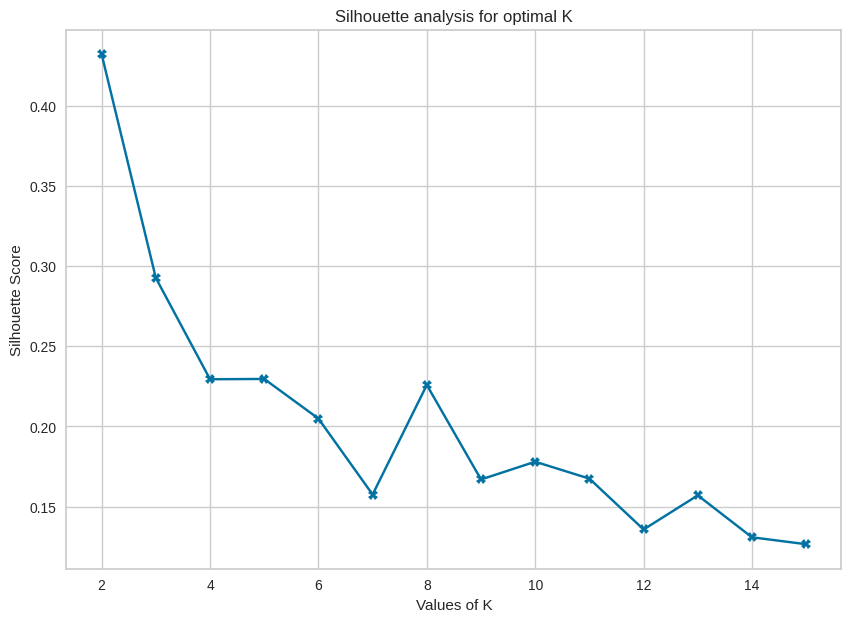

In [28]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg, 'bX-')
plt.xlabel('Values of K')
plt.ylabel("Silhouette Score")
plt.title('Silhouette analysis for optimal K')
plt.show()


**Kmeans Model Here we will take K value as 3 as per Elbow Method**

**model = KMeans(n_clusters=3):** This line initializes a KMeans clustering model with 3 clusters.

**model = model.fit(features):** The fit method is called on the KMeans model, fitting it to the scaled features (features). This process assigns each data point to one of the 3 clusters based on their similarity to the cluster centroids.

In [29]:
model=KMeans(n_clusters=3)
model=model.fit(features)


**y_km = model.predict(features):** This line predicts the cluster labels for the data points in the scaled features (features) using the trained KMeans model (model). Each data point is assigned to one of the clusters based on its similarity to the cluster centroids.

**centers = model.cluster_centers_:** This line retrieves the cluster centers from the trained KMeans model (model). These are the coordinates in the feature space that represent the centers of the clusters identified by the KMeans algorithm.

In [30]:
y_km=model.predict(features)
centers=model.cluster_centers_

**df['Cluster'] = pd.DataFrame(y_km):** This line adds a new column named 'Cluster' to the DataFrame df and assigns the predicted cluster labels (y_km) to this column. The pd.DataFrame() function is used to convert the NumPy array y_km into a DataFrame before assigning it to the new column.

**df.to_csv("Cluster_data.csv", index=False):** This line saves the modified DataFrame df to a CSV file named "Cluster_data.csv" without including the index column. The index=False parameter specifies that the index column should not be included in the CSV file.

In [31]:
df['Cluster']=pd.DataFrame(y_km)
df.to_csv("Cluster_data", index=False)

**df["Cluster"]:** This syntax selects the "Cluster" column from the DataFrame df, returning a Series containing the cluster labels for each data point.

**.value_counts():** This method is applied to the Series obtained from the "Cluster" column. It counts the occurrences of each unique value (cluster label) in the Series and returns the counts as another Series, where the index represents the unique values (cluster labels) and the values represent their corresponding counts.

In [32]:
df["Cluster"].value_counts()

,count
Cluster,
0,14631
1,8448
2,6921


**sns.countplot(data=df, x='Cluster'):** This line uses Seaborn's countplot function to create a bar plot showing the count of each unique value in the 'Cluster' column of the DataFrame df. Each bar represents the frequency of data points belonging to a particular cluster.

**plt.show():** This command displays the plot on the screen.

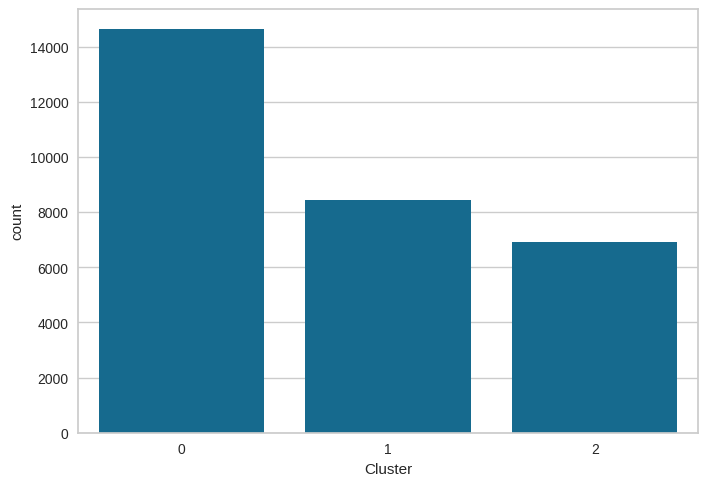

In [33]:
sns.countplot(data=df, x='Cluster')
plt.show()

**pd.read_csv('Cluster_data'):** This line reads the CSV file named "Cluster_data.csv" into a DataFrame named c_df. The read_csv() function from the Pandas library is used to read the CSV file.

**c_df.head():** This command displays the first five rows of the DataFrame c_df, providing a preview of the data. The head() function is commonly used to quickly examine the structure and content of a DataFrame.

In [34]:
c_df= pd.read_csv('Cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


**c_df['Total Search']:** This line creates a new column named 'Total Search' in the DataFrame c_df to store the total search activity for each entry.

**c_df.iloc[:, 3:38].sum(axis=1)**: This code selects the columns from the 4th column (index 3) to the 38th column of the DataFrame c_df using integer-based indexing (iloc). It then calculates the sum of values across these selected columns along the rows (axis=1), resulting in a Series containing the total search activity for each entry in the DataFrame.

In [35]:
c_df['Total Search']= c_df.iloc[:,3:38].sum(axis=1)

**c_df.groupby(['Cluster', 'Gender'], as_index=False).sum():** This part of the code groups the data in the DataFrame c_df by the columns 'Cluster' and 'Gender'. The sum() function is then applied to each group to calculate the sum of all numeric columns. The as_index=False parameter ensures that the group keys ('Cluster' and 'Gender') are not set as the index of the resulting DataFrame.

**.query('Cluster==0'):** This part filters the resulting DataFrame to include only the rows where the 'Cluster' column equals 0. The query() method allows for selecting rows based on a query expression.

In [36]:
cl_0=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==0')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,182197458,11711,2964,2371,2532,2153,1931,1761,...,3532,4957,2071,1015,783,2341,1375,1049,907,83859
1,0,M,33469976,2446,735,1002,501,19,88,191,...,343,197,202,95,62,444,228,193,175,12956


**plt.figure(figsize=(15, 6)):** This line sets up the size of the figure to be displayed, with a width of 15 inches and a height of 6 inches.

**plt.subplot(1, 2, 1):** This command creates the first subplot in a grid of 1 row and 2 columns, selecting the first position.

**sns.countplot(data=c_df.query('Cluster==0'), x='Gender'):** This line creates a count plot of 'Gender' for the data in "Cluster 0" of the DataFrame c_df.

**plt.title('Customers count')**: This line sets the title of the first subplot to "Customers count".

**plt.subplot(1, 2, 2):** This command creates the second subplot in the same grid, selecting the second position.

**sns.barplot(data=cl_0, x='Gender', y='Total Search'):** This line creates a bar plot of 'Total Search' by 'Gender' for the data in "Cluster 0" from the DataFrame cl_0.

**plt.title('Total Searches by Gender'):** This line sets the title of the second subplot to "Total Searches by Gender".

**plt.suptitle('No. of customer and their total searches in "Cluster 0"'):** This line sets a super title for the entire figure, providing a descriptive title for both subplots.

**plt.show():** This command displays the figure with the two subplots.

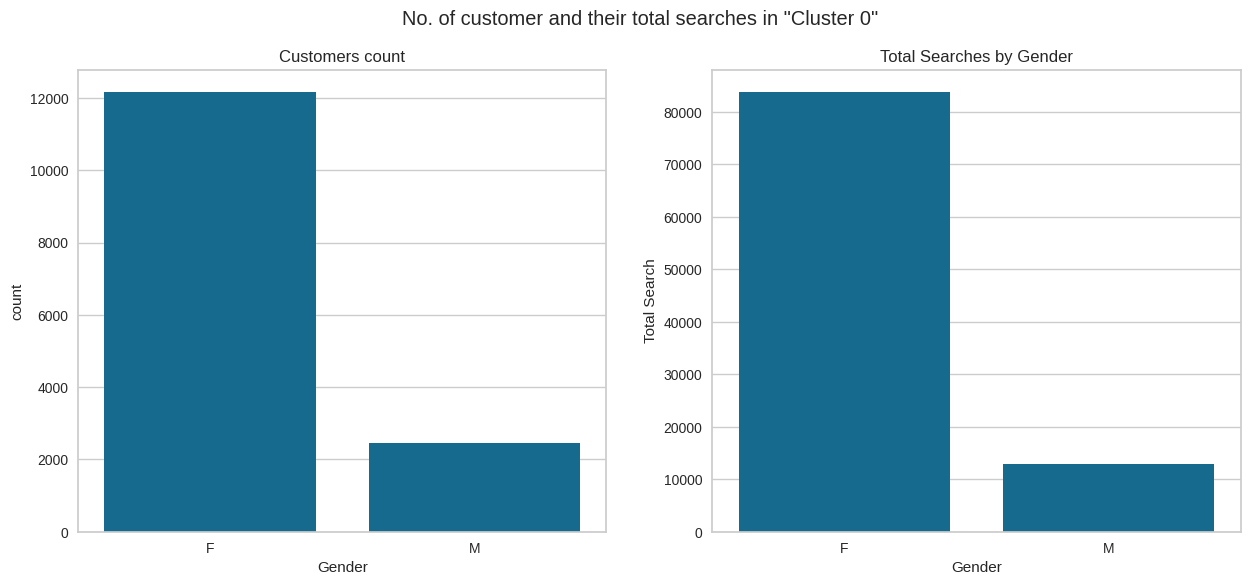

In [37]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==0'),x='Gender')
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=cl_0, x='Gender', y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of customer and their total searches in "Cluster 0"')
plt.show()

In [38]:
cl_1=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==1')
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,108629161,38319,1992,1590,1716,1481,1237,1091,...,2135,3190,1238,644,472,1301,843,653,445,51872
3,1,M,21001216,8182,510,672,299,21,49,162,...,246,102,120,62,39,308,186,111,96,8345


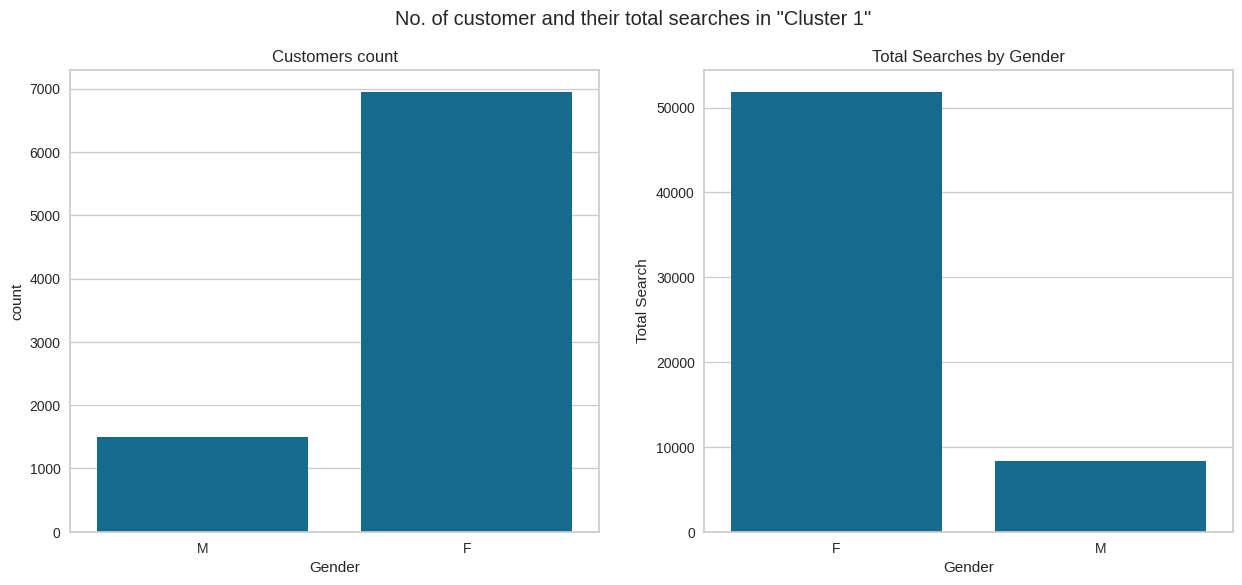

In [39]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==1'),x='Gender')
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=cl_1, x='Gender', y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of customer and their total searches in "Cluster 1"')
plt.show()

In [40]:
cl_2=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,86845024,52600,1419,1267,1343,1158,957,881,...,1654,2579,1016,442,327,1118,718,546,425,41760
5,2,M,17872165,11836,403,668,297,8,44,107,...,224,77,122,72,37,254,141,89,79,7351


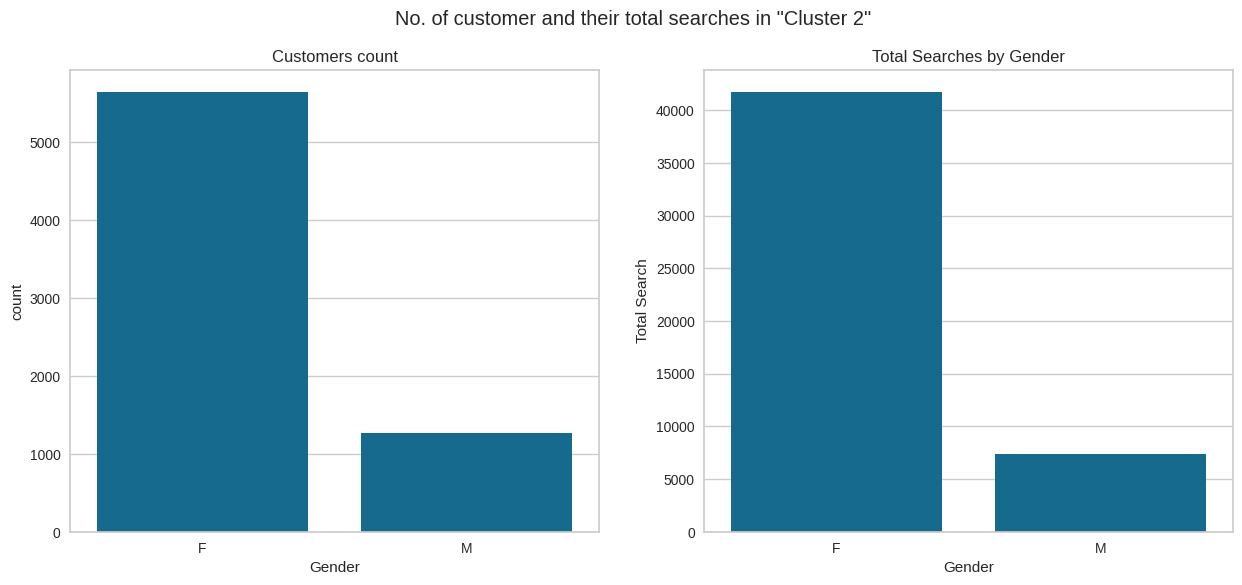

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==2'),x='Gender')
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=cl_2, x='Gender', y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of customer and their total searches in "Cluster 2"')
plt.show()

**c_df.groupby(['Cluster', 'Gender'], as_index=False):** This groups the data in the DataFrame c_df by the columns 'Cluster' and 'Gender'. The as_index=False parameter ensures that the group keys ('Cluster' and 'Gender') are not set as the index of the resulting DataFrame.

**.sum():** This calculates the sum of all numeric columns for each group. Since the DataFrame is grouped by 'Cluster' and 'Gender', the sum is computed separately for each combination of these two variables.

In [42]:
final_df=c_df.groupby(['Cluster','Gender'], as_index=False).sum()
final_df

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,182197458,11711,2964,2371,2532,2153,1931,1761,...,3532,4957,2071,1015,783,2341,1375,1049,907,83859
1,0,M,33469976,2446,735,1002,501,19,88,191,...,343,197,202,95,62,444,228,193,175,12956
2,1,F,108629161,38319,1992,1590,1716,1481,1237,1091,...,2135,3190,1238,644,472,1301,843,653,445,51872
3,1,M,21001216,8182,510,672,299,21,49,162,...,246,102,120,62,39,308,186,111,96,8345
4,2,F,86845024,52600,1419,1267,1343,1158,957,881,...,1654,2579,1016,442,327,1118,718,546,425,41760
5,2,M,17872165,11836,403,668,297,8,44,107,...,224,77,122,72,37,254,141,89,79,7351


**plt.figure(figsize=(15, 6)):** This line sets up the size of the figure to be displayed, with a width of 15 inches and a height of 6 inches.

**sns.countplot(data=c_df, x='Cluster', hue='Gender'):** This line creates a count plot using Seaborn's countplot function. It counts the occurrences of each unique value in the 'Cluster' column, with each cluster's bars further distinguished by color based on the 'Gender' column.

**plt.title('Total Customer on each cluster'):** This line sets the title of the plot to "Total Customer on each cluster", providing a descriptive title for the visualization.

**plt.show():** This command displays the plot.

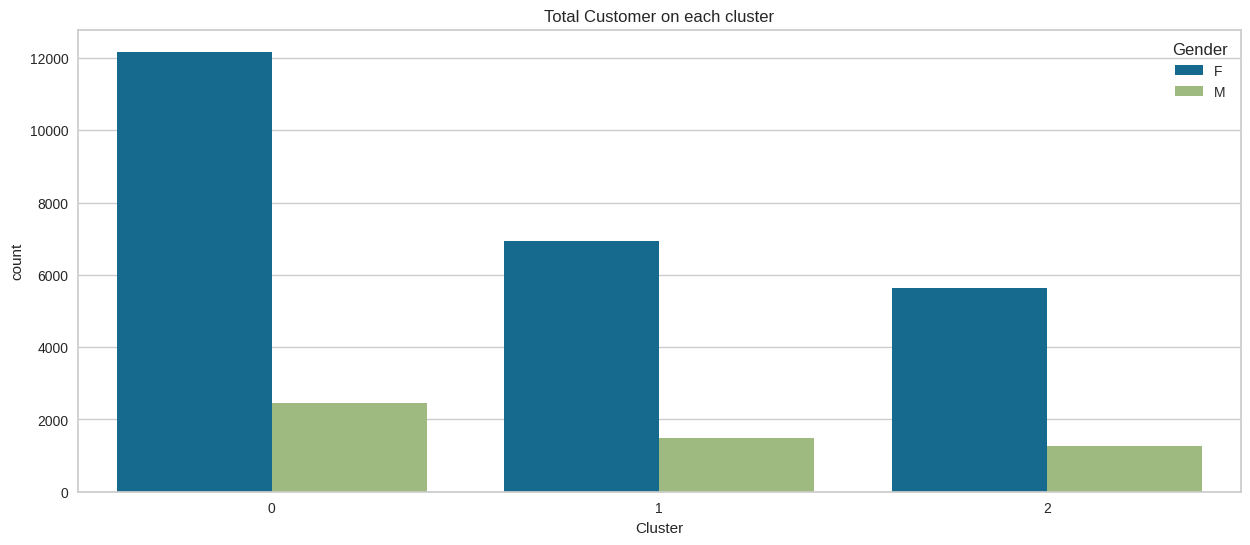

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(data=c_df,x='Cluster',hue='Gender')
plt.title('Total Customer on each cluster')
plt.show()

**plt.figure(figsize=(15, 6)):** This line sets up the size of the figure to be displayed, with a width of 15 inches and a height of 6 inches.

**plt.subplot(1, 2, 1):** This command creates the first subplot in a grid of 1 row and 2 columns, selecting the first position.

**sns.barplot(data=final_df, x='Cluster', y='Total Search'):** This line creates a bar plot of the 'Total Search' variable by 'Cluster' using Seaborn's barplot function.

**plt.title('Total Searches by each group'):** This line sets the title of the first subplot to "Total Searches by each group".

**plt.subplot(1, 2, 2):** This command creates the second subplot in the same grid, selecting the second position.

**sns.barplot(data=final_df, x='Cluster', y='Orders'):** This line creates a bar plot of the 'Orders' variable by 'Cluster' using Seaborn's barplot function.

**plt.title('Past Orders by each group'):** This line sets the title of the second subplot to "Past Orders by each group".

**plt.suptitle('No. of times customer searched the products and their past orders'):** This line sets a super title for the entire figure, providing a descriptive title for both subplots.

**plt.show()**: This command displays the figure with the two subplots.

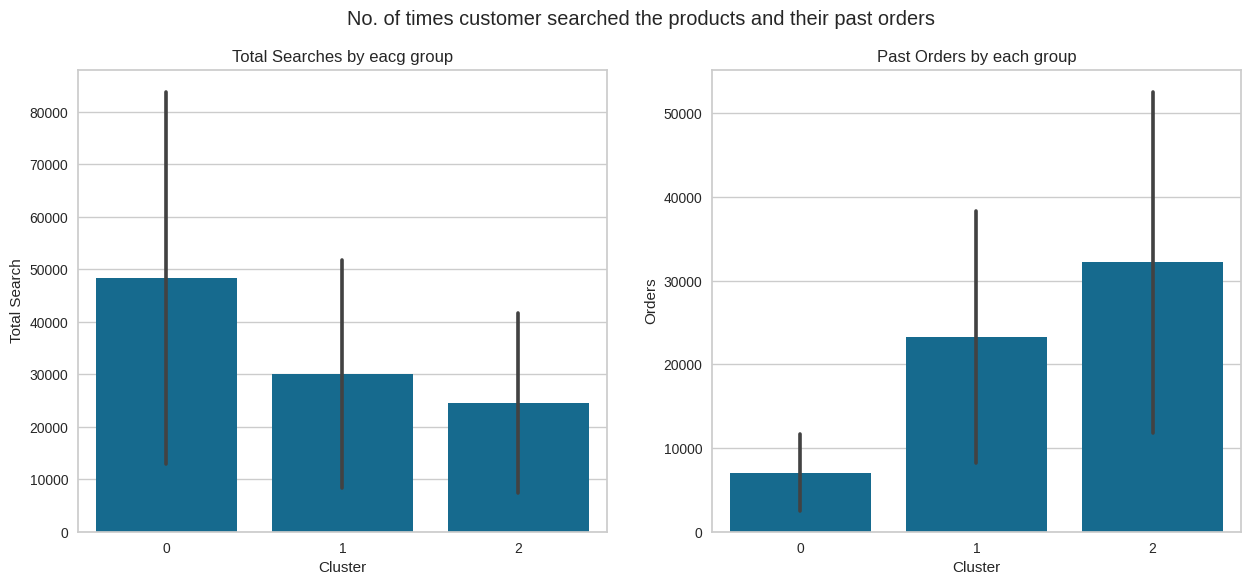

In [44]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df, x='Cluster',y='Total Search')
plt.title('Total Searches by eacg group')

plt.subplot(1,2,2)
sns.barplot(data=final_df, x='Cluster', y='Orders')
plt.title('Past Orders by each group')
plt.suptitle('No. of times customer searched the products and their past orders')
plt.show()

**plt.figure(figsize=(15,6)):** This line sets up the size of the figure to be displayed, with a width of 15 inches and a height of 6 inches.

**plt.subplot(1,3,3):** This command creates the third subplot in a grid of 1 row and 3 columns. It selects the third position for the subplot.

**sns.lineplot(data=final_df, x='Cluster', y='Total Search', label='Total Searches'):** This line creates a line plot showing the trend of 'Total Searches' across different clusters. The data parameter specifies the DataFrame to use, x specifies the column to use for the x-axis ('Cluster' in this case), y specifies the column to use for the y-axis ('Total Search' in this case), and label specifies the label for this line plot in the legend.

**sns.lineplot(data=final_df, x='Cluster', y='Orders', label='Past Orders'):** This line creates another line plot showing the trend of 'Past Orders' across different clusters. It follows a similar syntax as the previous line, but it plots 'Past Orders' on the y-axis.

**plt.title('Trend of Total Searches and Past Orders'):** This line sets the title of the subplot to "Trend of Total Searches and Past Orders".

**plt.xlabel('Cluster'):** This line sets the label for the x-axis to "Cluster".

**plt.ylabel('Count'):** This line sets the label for the y-axis to "Count".

**plt.legend():** This command displays the legend for the lines in the plot, indicating which line represents Total Searches and which represents Past Orders.

**plt.suptitle('No. of times customer searched the products and their past orders'):** This line sets a super title for the entire figure, providing a descriptive title for the plot.

**plt.tight_layout():** This command adjusts the layout to improve readability by preventing overlapping of subplots.

**plt.show()**: This command displays the figure with the line plot showing the trend of Total Searches and Past Orders over different clusters.

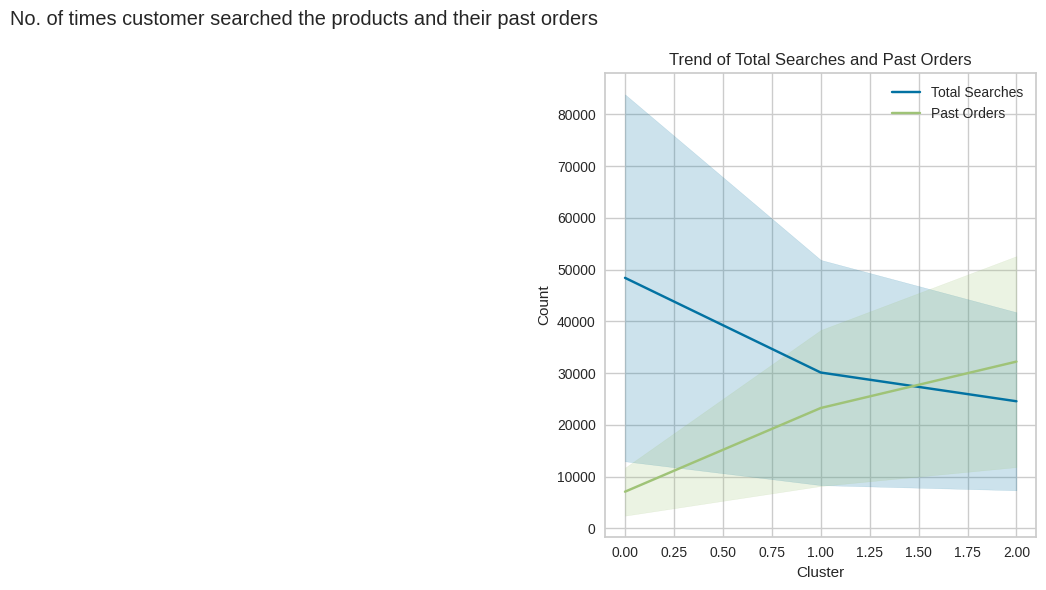

In [45]:
plt.figure(figsize=(15,6))

# Line plot for Trend of Total Searches and Past Orders over clusters
plt.subplot(1,3,3)
sns.lineplot(data=final_df, x='Cluster', y='Total Search', label='Total Searches')
sns.lineplot(data=final_df, x='Cluster', y='Orders', label='Past Orders')
plt.title('Trend of Total Searches and Past Orders')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend()

plt.suptitle('No. of times customer searched the products and their past orders')
plt.tight_layout()
plt.show()



**Conclusion**

In this project, we conducted an in-depth analysis of customer behavior using a dataset containing information on customer searches and past orders. Our goal was to gain insights into customer preferences, trends, and segmentation to inform business strategies and decision-making.

**Key Findings:**

1. **Customer Segmentation**: Through clustering analysis, we identified distinct groups of customers based on their search behavior and past orders. This segmentation allowed us to better understand the diverse needs and preferences of our customer base.

2. **Trends in Search Activity**: We observed variations in search activity across different customer segments. Some clusters showed higher levels of engagement with search features, indicating a strong interest in exploring products or services.

3. **Purchase Behavior**: Analyzing past orders revealed insights into customers' purchasing patterns and preferences. Certain clusters exhibited higher order frequency or larger order sizes, indicating potential high-value segments.

4. **Gender Analysis**: By examining search and order behavior by gender, we uncovered gender-specific trends and preferences. This information can be leveraged to tailor marketing strategies and product offerings to different demographic groups.

5. **Temporal Trends**: Temporal analysis revealed seasonal variations and trends in customer behavior over time. Understanding these temporal patterns can help optimize inventory management, marketing campaigns, and promotions.

**Implications and Recommendations:**

1. **Targeted Marketing Strategies**: Utilize customer segmentation insights to tailor marketing campaigns and promotions to specific customer segments. Personalized marketing strategies are likely to resonate more with customers and drive higher engagement and conversion rates.

2. **Product Recommendations**: Leverage insights into customer preferences and purchase behavior to provide personalized product recommendations. Implement recommendation systems based on past search history and order patterns to enhance the customer shopping experience.

3. **Inventory Management**: Use temporal trends and seasonal patterns to optimize inventory management and product stocking. Anticipate demand fluctuations and adjust inventory levels accordingly to minimize stockouts and excess inventory.

4. **Customer Experience Enhancement**: Continuously monitor customer feedback and sentiment analysis to identify areas for improvement in products, services, and overall customer experience. Addressing customer concerns and preferences can lead to higher satisfaction and loyalty.

5. **Predictive Analytics**: Explore the use of predictive analytics and machine learning models to forecast future customer behavior, such as churn prediction, lifetime value estimation, and demand forecasting. Anticipating customer needs and preferences enables proactive decision-making and strategic planning.

**Future Directions:**

1. **Enhanced Personalization**: Further refine customer segmentation and personalization strategies by incorporating additional demographic, behavioral, and psychographic data. Implement advanced machine learning techniques for predictive modeling and recommendation systems.

2. **Omni-channel Integration**: Integrate data from various channels and touchpoints, including online platforms, offline stores, mobile apps, and social media. Develop an omni-channel marketing approach to provide a seamless and consistent customer experience across all channels.

3. **Customer Journey Mapping**: Conduct detailed customer journey mapping to understand the end-to-end customer experience and identify pain points, friction points, and opportunities for optimization. Use journey maps to design targeted interventions and improve the overall customer journey.

4. **Ethical Considerations**: Pay attention to ethical considerations and data privacy concerns when collecting, analyzing, and utilizing customer data. Implement robust data governance frameworks and adhere to regulatory requirements to ensure the ethical use of customer information.

In conclusion, this project has provided valuable insights into customer behavior and preferences, enabling data-driven decision-making and strategic planning. By leveraging these insights and recommendations, businesses can enhance customer satisfaction, drive sales growth, and achieve long-term success in today's competitive marketplace.

